In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
WEATHER_BHOPAL_CSV = '/content/drive/MyDrive/Dev/AI/datasets/Weather_Bhopal.csv'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler

In [5]:
data = pd.read_csv(WEATHER_BHOPAL_CSV)
data.head()

,DATE,MAX_TEMP,MIN_TEMP,RAINFALL_24_HRS
0,1/1/2020,18.5,9.7,0.0
1,1/2/2020,20.3,12.0,0.0
2,1/3/2020,20.7,14.0,0.0
3,1/4/2020,20.5,11.0,0.0
4,1/5/2020,17.0,7.2,0.0


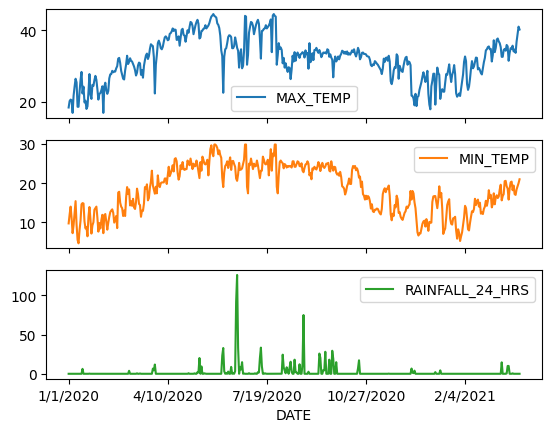

In [9]:
data.set_index('DATE')[["MAX_TEMP","MIN_TEMP","RAINFALL_24_HRS"]].plot(subplots=True);

In [10]:
input_data = data[["MAX_TEMP","MIN_TEMP","RAINFALL_24_HRS"]]
input_data.head()

,MAX_TEMP,MIN_TEMP,RAINFALL_24_HRS
0,18.5,9.7,0.0
1,20.3,12.0,0.0
2,20.7,14.0,0.0
3,20.5,11.0,0.0
4,17.0,7.2,0.0


In [12]:
input_data.describe()

,MAX_TEMP,MIN_TEMP,RAINFALL_24_HRS
count,456.000000,456.000000,456.00000
mean,32.059430,18.298465,2.05693
std,6.042076,6.088542,9.35162
min,17.000000,4.600000,0.00000
25%,28.400000,13.400000,0.00000
50%,32.500000,18.600000,0.00000
75%,35.500000,24.000000,0.00000
max,44.500000,29.900000,126.20000


In [13]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(input_data)

In [16]:
X = scaled_data
Y = scaled_data[:, -1]

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, shuffle=False)

In [18]:
TimeseriesGenerator(xtrain, ytrain, length=5, sampling_rate=1, batch_size=1)[0]

(array([[[0.05454545, 0.20158103, 0.        ],
         [0.12      , 0.29249012, 0.        ],
         [0.13454545, 0.3715415 , 0.        ],
         [0.12727273, 0.25296443, 0.        ],
         [0.        , 0.1027668 , 0.        ]]]),
 array([0.]))

In [19]:
win_len=10
train_generator = TimeseriesGenerator(xtrain, ytrain, length=win_len, sampling_rate=1, batch_size=32)
test_generator = TimeseriesGenerator(xtest, ytest, length=win_len, sampling_rate=1, batch_size=32)

In [20]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import tensorflow as tf

In [21]:
type(train_generator)

keras.preprocessing.sequence.TimeseriesGenerator

In [22]:
model = Sequential()
model.add(LSTM(32, input_shape=(win_len, 3), activation='tanh', return_sequences=True))
model.add(LSTM(32, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='tanh', return_sequences=False))
model.add(Dense(5, activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 32)            4608      
                                                                 
 lstm_1 (LSTM)               (None, 10, 32)            8320      
                                                                 
 dropout (Dropout)           (None, 10, 32)            0         
                                                                 
 lstm_2 (LSTM)               (None, 10, 32)            8320      
                                                                 
 dropout_1 (Dropout)         (None, 10, 32)            0         
                                                                 
 lstm_3 (LSTM)               (None, 10, 32)            8320      
                                                                 
 dropout_2 (Dropout)         (None, 10, 32)            0

In [23]:
from keras.callbacks import EarlyStopping

In [24]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=3)
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='adam', metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [25]:
history = model.fit_generator(train_generator, epochs=100, validation_data=test_generator, shuffle=False)

<ipython-input-25-abdbc0862a38>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=100, validation_data=test_generator, shuffle=False)


Epoch 1/100
11/11 [==============================] - 33s 788ms/step - loss: 0.0082 - mean_absolute_error: 0.0382 - val_loss: 0.0024 - val_mean_absolute_error: 0.0489
Epoch 2/100
11/11 [==============================] - 2s 153ms/step - loss: 0.0080 - mean_absolute_error: 0.0360 - val_loss: 3.8150e-04 - val_mean_absolute_error: 0.0162
Epoch 3/100
11/11 [==============================] - 1s 74ms/step - loss: 0.0075 - mean_absolute_error: 0.0338 - val_loss: 0.0011 - val_mean_absolute_error: 0.0318
Epoch 4/100
11/11 [==============================] - 1s 57ms/step - loss: 0.0076 - mean_absolute_error: 0.0365 - val_loss: 5.7941e-04 - val_mean_absolute_error: 0.0224
Epoch 5/100
11/11 [==============================] - 1s 58ms/step - loss: 0.0075 - mean_absolute_error: 0.0336 - val_loss: 7.5195e-04 - val_mean_absolute_error: 0.0263
Epoch 6/100
11/11 [==============================] - 1s 79ms/step - loss: 0.0075 - mean_absolute_error: 0.0359 - val_loss: 7.0399e-04 - val_mean_absolute_error: 0.02

In [26]:
ypred= model.predict(test_generator)

4/4 [==============================] - 5s 12ms/step


In [27]:
pred_data = pd.concat([pd.DataFrame(ypred), pd.DataFrame(xtest[:, 1:][win_len:]) ], axis=1)

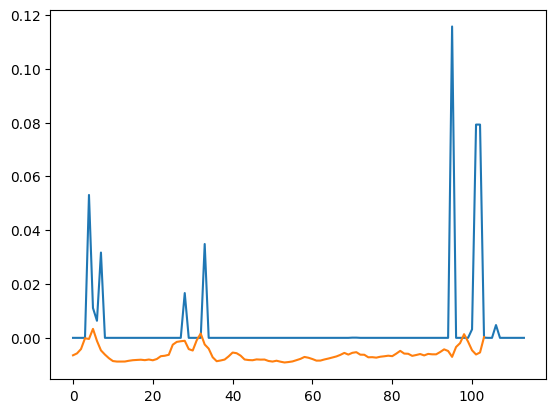

In [28]:
plt.plot(ytest)
plt.plot(ypred)
plt.show()

In [ ]:
ai_ml = pd.DataFrame(xtest[:, 1:][win_len:])
ai_ml

In [ ]:
final_data = scaler.inverse_transform(pred_data)
final_data

In [30]:
df_main= input_data[ypred.shape[0]*-1:]
df_main.count()

MAX_TEMP           104
MIN_TEMP           104
RAINFALL_24_HRS    104
dtype: int64

In [32]:
df_main['Rain_pred'] = final_data[:, 0]
df_main

<ipython-input-32-51da5eee85db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['Rain_pred'] = final_data[:, 0]


,MAX_TEMP,MIN_TEMP,RAINFALL_24_HRS,Rain_pred
352,21.4,7.4,0.0,16.821699
353,21.7,6.6,0.0,16.841109
354,23.4,7.2,0.0,16.885217
355,24.5,7.1,0.0,16.995563
356,25.6,8.4,0.0,16.988840
...,...,...,...,...
451,33.7,17.0,0.0,16.961113
452,36.8,18.4,0.0,16.872852
453,38.9,19.2,0.0,16.829855
454,41.0,20.0,0.0,16.850656


<Axes: >

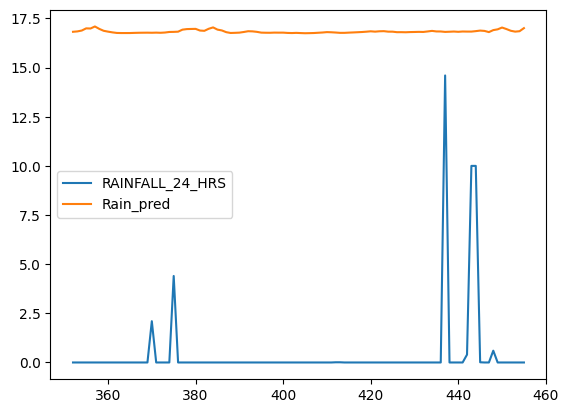

In [33]:
df_main[['RAINFALL_24_HRS', 'Rain_pred']].plot()

# [Jay Nakum](https://jaynakum.github.io) [20BCP304D]